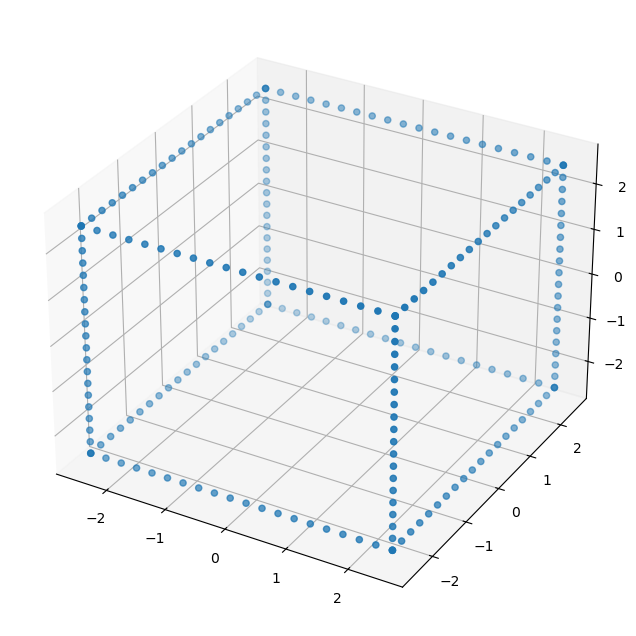

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def create_point_box(a=1,b=1,c=1,aS = 16,bS = 16,cS = 16):
  ah, bh, ch = a/2, b/2, c/2;

  p1, p2 = np.array([ah, bh, ch]), np.array([ah, -bh, ch])
  points = np.linspace(p1, p2, num=bS)

  p2 = np.array([-ah, bh, ch])
  points = np.append(points, np.linspace(p1, p2, num=aS), axis=0)
  
  p2 = np.array([ah, bh, -ch])
  points = np.append(points, np.linspace(p1, p2, num=cS), axis=0)
  
  p1, p2 = np.array([-ah, -bh, -ch]), np.array([-ah, bh, -ch])
  points = np.append(points, np.linspace(p1, p2, num=bS), axis=0)
  
  p2 = np.array([ah, -bh, -ch])
  points = np.append(points, np.linspace(p1, p2, num=aS), axis=0)
  
  p2 = np.array([-ah, -bh, ch])
  points = np.append(points, np.linspace(p1, p2, num=cS), axis=0)
  
  p1, p2 = np.array([-ah, bh, -ch]), np.array([ah, bh, -ch])
  points = np.append(points, np.linspace(p1, p2, num=aS), axis=0)

  p1 = np.array([ah, -bh, -ch])
  points = np.append(points, np.linspace(p1, p2, num=bS), axis=0)
  
  p2 = np.array([ah, -bh, ch])
  points = np.append(points, np.linspace(p1, p2, num=cS), axis=0)
  
  p1 = np.array([-ah, -bh, ch])
  points = np.append(points, np.linspace(p1, p2, num=aS), axis=0)
  
  p2 = np.array([-ah, bh, ch])
  points = np.append(points, np.linspace(p1, p2, num=bS), axis=0)
  
  p1 = np.array([-ah, bh, -ch])
  points = np.append(points, np.linspace(p1, p2, num=cS), axis=0)

  return points;

point_box = create_point_box(5,5,5, 20,20,20)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(point_box[:, 0], point_box[:, 1], point_box[:, 2])

plt.show()



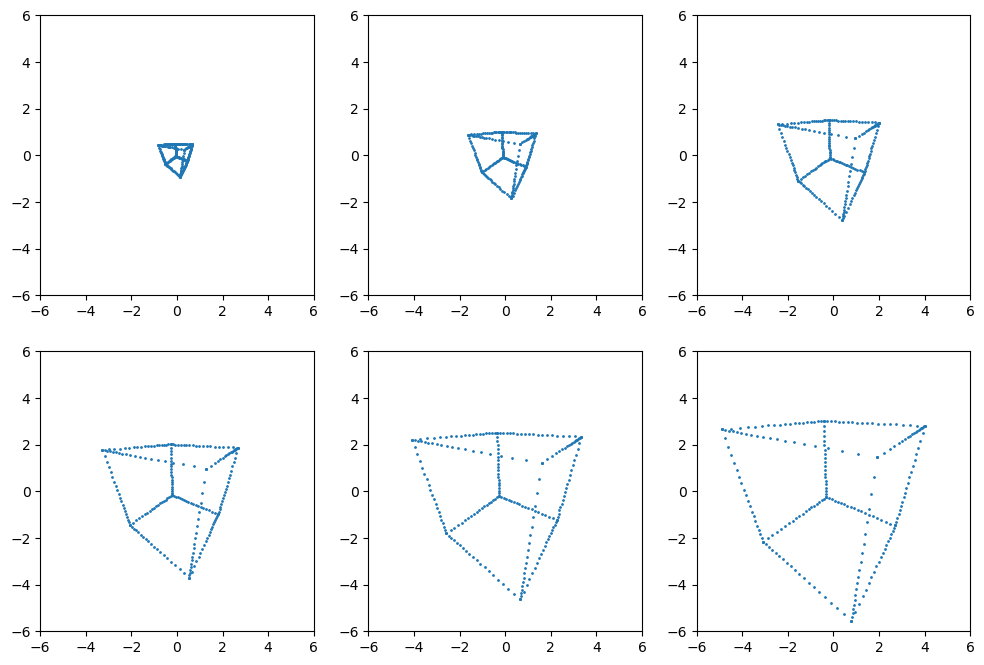

In [106]:
# create a translation matrix
# x and y are the translation in the x and y direction
def tranMatrix(x,y,z):
    return np.array([[1,0,0,x],
                     [0,1,0,y],
                     [0,0,1,z],
                     [0,0,0,1]])

# create a scaling matrix
# x and y are the scaling in the x and y direction
def scaleMatrix(x,y,z):
    return np.array([[x,0,0,0],
                     [0,y,0,0],
                     [0,0,z,0],
                     [0,0,0,1]])

# create a rotation matrix
# angle is the rotation in radians
def rotZMatrix(angle):
    return np.array([[np.cos(angle),-np.sin(angle),0,0],
                     [np.sin(angle), np.cos(angle),0,0],
                     [            0,             0,1,0],
                     [            0,             0,0,1]])
def rotYMatrix(angle):
    return np.array([[ np.cos(angle),0,np.sin(angle),0],
                     [             0,1,            0,0],
                     [-np.sin(angle),0,np.cos(angle),0],
                     [             0,0,            0,1]])
def rotXMatrix(angle):
    return np.array([[1,            0,             0,0],
                     [0,np.cos(angle),-np.sin(angle),0],
                     [0,np.sin(angle), np.cos(angle),0],
                     [0,            0,             0,1]])

# apply a matrix to a polygon
# mat is the matrix to apply, pol is the polygon to apply it to
def applyMatrix(mat,pol):
    verts = []
    for i in range(pol.shape[0]):
        verts.append(mat@pol[i])
    return np.array(verts)

def make_projection(points, d=1.0):
  P = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 1/d, 0]
  ])
  proy = applyMatrix(P, points)
  return proy

def make_orthographic(points):
  ortho = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
  ])
  proy = applyMatrix(ortho, points)
  return proy

def make_homogeneous(points):
  return np.hstack((points, np.ones((points.shape[0], 1))))

def make_ndc(points):
  ndc_points = points.transpose()
  ndc_points /= ndc_points[-1]
  return ndc_points

def add_subplot(ax, points, proj = True, d = 1):
  if proj:
    clip_points = make_projection(points, d)
  else:
     clip_points = make_orthographic(points)
  ndc_points = make_ndc(clip_points)
   
  ax.scatter(ndc_points[0], ndc_points[1], s=1)
  ax.set_xbound(-6, 6)
  ax.set_ybound(-6, 6)

hom_points = make_homogeneous(point_box)
modelMatrix = tranMatrix(0,0,6) @ rotXMatrix(-np.pi/6) @ rotYMatrix(np.pi/5)
hom_points = applyMatrix(modelMatrix, hom_points)


fig = plt.figure(figsize=(4*3, 4*2))

add_subplot(fig.add_subplot(231), hom_points)
add_subplot(fig.add_subplot(232), hom_points, d=2)
add_subplot(fig.add_subplot(233), hom_points, d=3)
add_subplot(fig.add_subplot(234), hom_points, d=4)
add_subplot(fig.add_subplot(235), hom_points, d=5)
add_subplot(fig.add_subplot(236), hom_points, d=6)

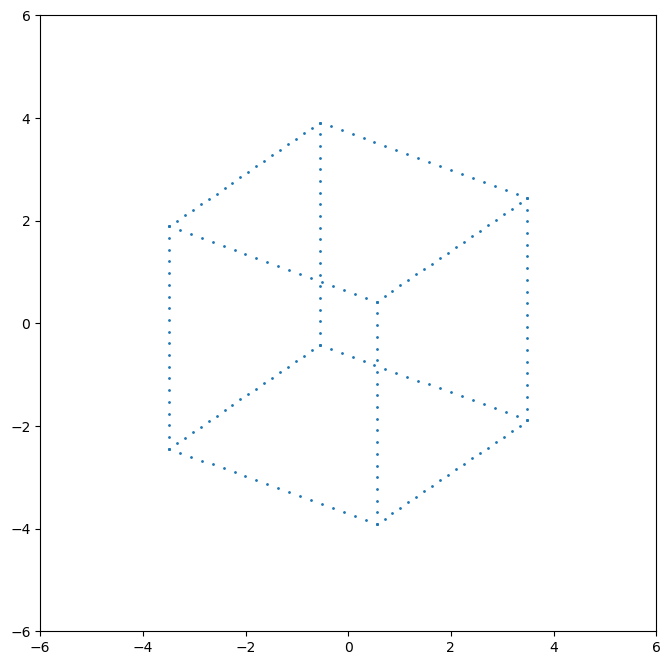

In [ ]:


ortho_points = make_orthographic(hom_points, 1.5)

ndc_points = ortho_points.transpose()
ndc_points /= ndc_points[-1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

ax.scatter(ndc_points[0], ndc_points[1], s=1)
ax.set_xbound(-6, 6)
ax.set_ybound(-6, 6)
ax.set_aspect('equal', adjustable='box')